# Task 1: Data cleaning and preprocessing

The goal of this data science project is to understand the role of social media as news source in this digital age. 

The input data we have access to:

1. Daily twitter counts for the year 2021, worldwide and for 2 coutries: USA and UK.
2. List of key events for the year 2021 as reported by mainstream media.

Based on the project goal and the data we have access to we can frame the problem with the following questions:
Is Twitter activity impacted by big media events? Are these events localised or are they global?

*Our working hypothesis:*

**Hypothesis 1:** Important events will trigger a peak in twitter activity. 

**Hypothesis 2:** The biggest events will have an impact globaly. 

**Hypothesis 3:** Some peak twitter activity can be matched to events reported by mainstream media.

_______________________

<font color='blue'>Do you agree with these hypothesis? Are they different ones you think you can also validate witht he data we have?</font>

_______________________

Before verifying our hypothesis we need to prepare our input data and extract the important features. This is what we call data pre-processing or ETL (Extract, Transform and Load). This is an important step in data analytics and can even require more work than the actual analysis step.

## Objective

As discussed in **Topic A**, there are many ways of doing ETL and it is dependent on the data and the use case. For this specific problem, we need to identify key event dates in the dataset which correspond to high twitter activity. We will be comparing this activity worldwide and between the US and UK so we also need to make sure that our data are at the right scale and can be compared.

The final data table should have key dates column and tweets volumes worldwide and for the 2 countries of concern.

The final data table will look like this:

| Key dates     | worldwide | USA     | UK      |
|:--------------|:----------|:--------|:--------|
| 05/03/2021    | 3245333   | 764465  | 195334  |
| 21/04/2021    | 2878657   | 349900  | 110391  |
| 11/06/2021    | 8875246   | 110433  | 88845   |
| 02/09/2021    | 1533466   | 385323  | 208946  |
| 17/09/2021    | 3792222   | 554258  | 100043  |

## Setup the environment

Let us start by setting up our analytics environement by calling the required packages for this task. 

We will need the following libraries:

* **pandas**: library for data manipulation. It will help us structure the data.
* **sklearn**: library of different analytics models. In this case we will use the linear regression model.
* **matplotlib.pyplot**: plotting library. We will use this to visualise data.
* **numpy**: array handling an mathematic library for python.
* **datetime**: a package which handles date and time data formatting.

Run the following cell to import the packages:

In [284]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime as dt
import numpy as np

## Reading the input data

We will start by reading the twitter data from an excel file. We will use the **pandas** library to generate a structured data table called a **dataframe**. 
To read the data we need the name of the data file and the location or path to where the file is stored.
Run the next cell to read the data. We will call our dataframe twitter_counts.

In [285]:
twitter_counts = pd.read_excel('./input_data/test_data.xlsx', sheet_name='test_data',engine='openpyxl')

We can preview the dataframe and diplay some basic information using **pandas** commands. Some very useful commands to know are:\
**twitter_counts.shape**: Display number of rows and columns\
**twitter_counts.head(n)** Diplay first n rows of the DataFrame\
**twitter_counts.tail(n)** Diplay last n rows of the DataFrame\
**twitter_counts.info()** Display Index, Datatype and Memory information\
**twitter_counts.describe()** Provides summary statistics for numerical columns\
**twitter_counts.colums** : Display list of dataframe attributes

Have a go at testing these different commands in the cell below.
_________________

Using the *twitter_counts.head(n)*, preview the first 10 rows of the dataframe.

Using the *describe* command can you tell:

1. what is the maximum number of daily tweets worldwide?
2. what is the average number of daily tweet in the UK and how does it compare the average in the USA?

In [286]:
print('Number of rows and columns')
twitter_counts.shape

Number of rows and columns


(249, 4)

## Visualising the input data

We will use the **matplotlib** libray to visualise the data. Below is a code snippet of how you can create a visual. Have a go at changing visual's parameters such as title, labels, colour or date range.
_____________________

1. <font color='blue'>Can you describe the data?</font>
2. Can you comment the line which plots the *worlwide* count? Remember to comment a code line just put the hash symbol **#** at the start of it.
3. Can you visualise the data between 1st of February and 31st of March 2021? Do you notice anything?

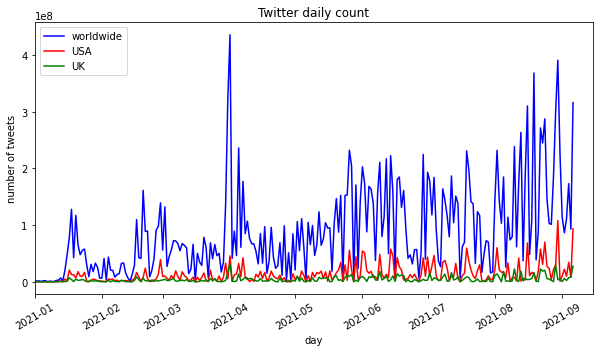

In [287]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(twitter_counts['day'],twitter_counts['worldwide'],color='blue',label='worldwide')
ax.plot(twitter_counts['day'],twitter_counts['USA'],color='red',label='USA')
ax.plot(twitter_counts['day'],twitter_counts['UK'],color='green',label='UK')
ax.set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily count',\
       xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 15)])
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

## Scaling the data

We already know from the summary statistics that the average daily number of tweets in the USA is higher compared to the UK and this is also visible in the plot above.\
Does this mean that twitter usage is higher in the USA? Not necessarily. We cannot answer this question just from comparing the daily counts side by side as the current data do not account for population size. The USA population is significantly higher to that of the UK. To be able to compare twitter activity between the 2 countries we need to bring the data to the same scale. In other words, we need to calulate the number of tweets by person or for a better scaling in thi case, we can calculate the number of tweets by 1 million people.

Let us add to the data table new columns with the scaled twitter counts.

Go ahead and replace for each country and also worldwide the scaling factor **1.** by the corresponding population size in millions then run the code in the cell to generate the new attributes in the dataframe.

Remember that you can always use the pandas commands learned at the start to preview or run statistics on your new dataframe.

In [288]:
twitter_counts['USA_scaled']=np.floor(twitter_counts['USA']/329.)
twitter_counts['UK_scaled']=np.floor(twitter_counts['UK']/67.)
twitter_counts['worldwide_scaled']=np.floor(twitter_counts['worldwide']/7000.)

If you scaled the data correctly you should see a difference when plotting the count and scaled_count together.
Run the plots below to check your scaling. You can always update the scaling values above.

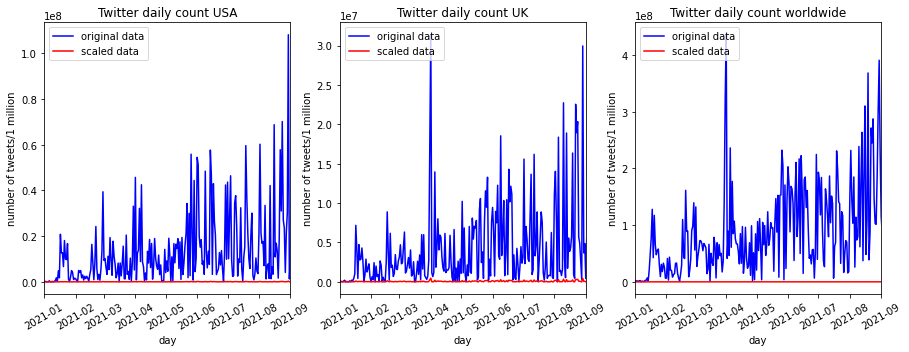

In [289]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(twitter_counts['day'],twitter_counts['USA'],color='blue',label='original data')
ax[0].plot(twitter_counts['day'],twitter_counts['USA_scaled'],color='red',label='scaled data')
ax[0].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count USA',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[0].tick_params(axis='x', rotation=30) 
ax[0].legend(loc="upper left")

ax[1].plot(twitter_counts['day'],twitter_counts['UK'],color='blue',label='original data')
ax[1].plot(twitter_counts['day'],twitter_counts['UK_scaled'],color='red',label='scaled data')
ax[1].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count UK',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[1].tick_params(axis='x', rotation=30) 
ax[1].legend(loc="upper left")

ax[2].plot(twitter_counts['day'],twitter_counts['worldwide'],color='blue',label='original data')
ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_scaled'],color='red',label='scaled data')
ax[2].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count worldwide',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[2].tick_params(axis='x', rotation=30) 
ax[2].legend(loc="upper left")

plt.show()

From now on we will be using the scaled_counts for the rest of the pre-processing.

## Extracting key event dates


When looking at the daily twitter counts plot we notice few things:

There is a steady growth of twitter activity across the year 2021. This is what we marked in pink in the figure below and is due to more people signing up to the service and also due to increased usage. This daily growth reflects how well Twitter is doing as a social media platform. Historically, it hasn't always been growing. 

We call this **baseline** activity. Over this baseline we have spikes which correspond to sudden activity peaks (some flagged in purple below). There are events that trigger these activity peaks and this is what we are trying to extract. Before we extract these peaks, it is important to remove the baseline data. This is because, we only care about excess activity compared to what is expected from normal daily activity. One way to understand why it is important to subtract the baseline is to compare **Event A** and **Event B** marked in the figure below. One would think that Event B is more significant as it has a higher count of tweets but if you remove the baseline (which is due to normal growth) the excess count for event B is actually similar to A. So if we want to compare activity peaks between days, it is important to remove the baseline first.

<img src="./images/twitter_data.png" width="80%"/>



### Baseline data

To remove baseline counts we will estimate the baseline count. For that, we will assume that the daily growth is linear and use a regression model (as explained in **Topic B**) to fit a line to the baseline. A growth curve is not always linear. In fact, it rarely is. Modeling a baseline depends on the shape of the curve, for example, population growth curves tend to be exponential. In that case we would use an exponential curve to approximate the baseline. In our case a straight line is a good enough approximation (for a more accurate fit, a polynomial curve would be more advisable).  
Before we can fit a straight line We can smooth the data to minimise the peaks using a moving median. This means, we will replace every point in the curve with the calculation of the median within a fixed window around the point (see **Topic C** for more in depth explanation). The wider the window, the smoother is the curve. 
Bellow we are calculating the moving median for each of our 3 curves using window=2. 

Go ahead and change the window size. 

In [291]:
twitter_counts['worldwide_m_median'] = twitter_counts['worldwide_scaled'].rolling(window=7).median()
twitter_counts['USA_m_median'] = twitter_counts['USA_scaled'].rolling(window=7).median()
twitter_counts['UK_m_median'] = twitter_counts['UK_scaled'].rolling(window=7).median()

You should keep the window size for the three curves the same. 
By running the cell below you will plot the oricinal curves in blue together with the smoothed curves in red. You should notice that the red curve is getting smoother for bigger window sizes.\

For the rest of the exercise, fix the window size to 7 which corresponds to averaging the data over 1 week.

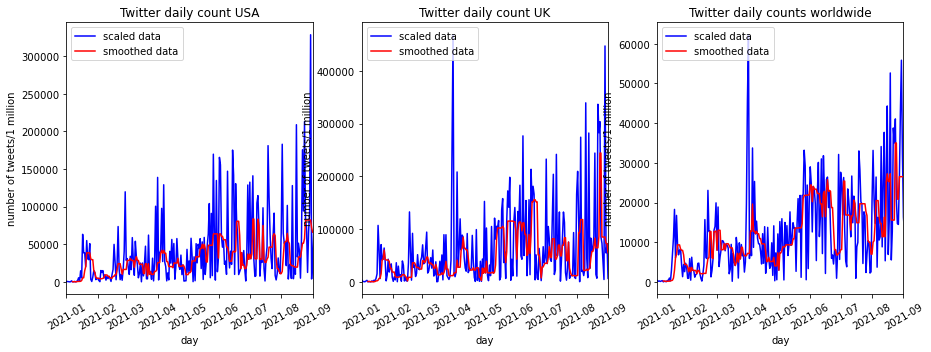

In [292]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(twitter_counts['day'],twitter_counts['USA_scaled'],color='blue',label='scaled data')
ax[0].plot(twitter_counts['day'],twitter_counts['USA_m_median'],color='red',label='smoothed data')
ax[0].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count USA',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[0].tick_params(axis='x', rotation=30) 
ax[0].legend(loc="upper left")

ax[1].plot(twitter_counts['day'],twitter_counts['UK_scaled'],color='blue',label='scaled data')
ax[1].plot(twitter_counts['day'],twitter_counts['UK_m_median'],color='red',label='smoothed data')
ax[1].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count UK',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[1].tick_params(axis='x', rotation=30)
ax[1].legend(loc="upper left")

ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_scaled'],color='blue',label='scaled data')
ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_m_median'],color='red',label='smoothed data')
ax[2].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily counts worldwide',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[2].tick_params(axis='x', rotation=30) 
ax[2].legend(loc="upper left")

plt.show()

Bellow, we are listing the available columns in the dataframe. Notice the new columns we created. Remember you can preview your data frame using the **dataframe.head(n)** command!

In [293]:
twitter_counts.columns

Index(['day', 'worldwide', 'USA', 'UK', 'USA_scaled', 'UK_scaled',
       'worldwide_scaled', 'worldwide_m_median', 'USA_m_median',
       'UK_m_median'],
      dtype='object')

### Regression modelling

Before fitting a line to the smoothed data using a regression model we need to convert our dates to ordinal dates. This is basically converting the dates from a day-month-year format to a number. The regression function cannot deal with dates and can only accept numerical variables as input (see **Topic D** about data input format).

In [294]:
twitter_counts['day_ordinal']=twitter_counts['day'].map(dt.datetime.toordinal)

We are now ready to run a regression model. This is done by applying the function LinearRegression from the sklearn library to the smoothed data. The Dependent variable is the date converted to ordinal 'day_ordinal' and the independent variable is each of the rolled average counts ['worldwide_R_average','USA_R_average','UK_R_average']. We excluded Null values from the fit.

In [295]:
regression1=LinearRegression().fit(twitter_counts[twitter_counts['worldwide_m_median'].notnull()][['day_ordinal']],\
                                  twitter_counts[twitter_counts['worldwide_m_median'].notnull()]['worldwide_m_median'])

regression2=LinearRegression().fit(twitter_counts[twitter_counts['USA_m_median'].notnull()][['day_ordinal']],\
                                  twitter_counts[twitter_counts['USA_m_median'].notnull()]['USA_m_median'])

regression3=LinearRegression().fit(twitter_counts[twitter_counts['UK_m_median'].notnull()][['day_ordinal']],\
                                  twitter_counts[twitter_counts['UK_m_median'].notnull()]['UK_m_median'])

We now need to create new columns in the dataframe which will have the baseline counts for each curve. These counts are calculated using the regression model results and by calling the **predict** function applied to the dependent variable.

In [296]:
twitter_counts['worldwide_baseline'] = regression1.predict(twitter_counts[['day_ordinal']])
twitter_counts['USA_baseline'] = regression2.predict(twitter_counts[['day_ordinal']])
twitter_counts['UK_baseline'] = regression3.predict(twitter_counts[['day_ordinal']])

Remember, you can always use pandas' commands from the start to check your dataframe and run basic statistics.

In [297]:
twitter_counts.columns

Index(['day', 'worldwide', 'USA', 'UK', 'USA_scaled', 'UK_scaled',
       'worldwide_scaled', 'worldwide_m_median', 'USA_m_median', 'UK_m_median',
       'day_ordinal', 'worldwide_baseline', 'USA_baseline', 'UK_baseline'],
      dtype='object')

Let us plot the scaled counts curves (in blue) together with their regression fit (line in red). 
You will notice that despite the approximated model the fit to the baseline is good.

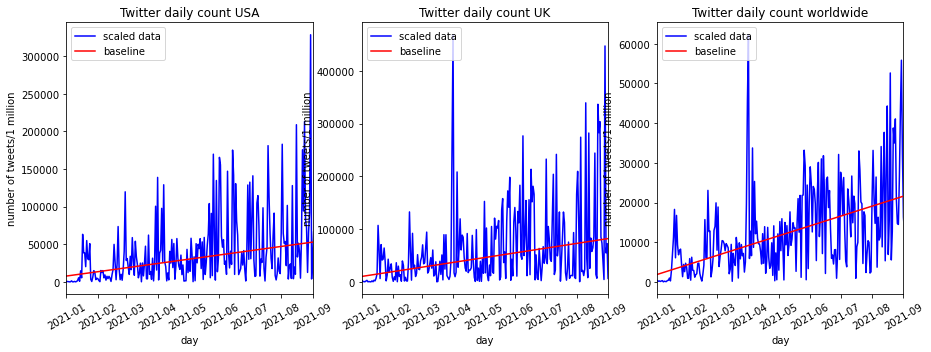

In [298]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(twitter_counts['day'],twitter_counts['USA_scaled'],color='blue',label='scaled data')
ax[0].plot(twitter_counts['day'],twitter_counts['USA_baseline'],color='red',label='baseline')
ax[0].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count USA',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[0].tick_params(axis='x', rotation=30) 
ax[0].legend(loc="upper left")

ax[1].plot(twitter_counts['day'],twitter_counts['UK_scaled'],color='blue',label='scaled data')
ax[1].plot(twitter_counts['day'],twitter_counts['UK_baseline'],color='red',label='baseline')
ax[1].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count UK',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[1].tick_params(axis='x', rotation=30) 
ax[1].legend(loc="upper left")

ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_scaled'],color='blue',label='scaled data')
ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_baseline'],color='red',label='baseline')
ax[2].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count worldwide',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[2].tick_params(axis='x', rotation=30) 
ax[2].legend(loc="upper left")

plt.show()

Time to subtract baseline data! We will call the left over data **residuals**.

In [299]:
twitter_counts['worldwide_residuals']=twitter_counts['worldwide_scaled']-twitter_counts['worldwide_baseline']
twitter_counts['USA_residuals']=twitter_counts['USA_scaled']-twitter_counts['USA_baseline']
twitter_counts['UK_residuals']=twitter_counts['UK_scaled']-twitter_counts['UK_baseline']

We are not done yet! If you see the plot of the residual data below, you will notice that although we do capture peak activities we also capture lots of noise. This is because our approximation of the baseline as a straight line is very crude. In reality, even if the number of tweets is steadily increasing daily, it is not increasing with a fixed amount. There are fluctuations around that averaged amount. Those fluctuations are still part of the baseline and should be ignored. 
There are statistical techniques to estimate those variations in the data such as the Root Mean Square (RMS) method. We alredy calculated that for the 3 curves we have and we will just use those pre-calculated numbers.\
We will then assume that any daily count within those fluctuation is due to normal daily variations and that a true high activity peak should be significanly above these fluctuations. 

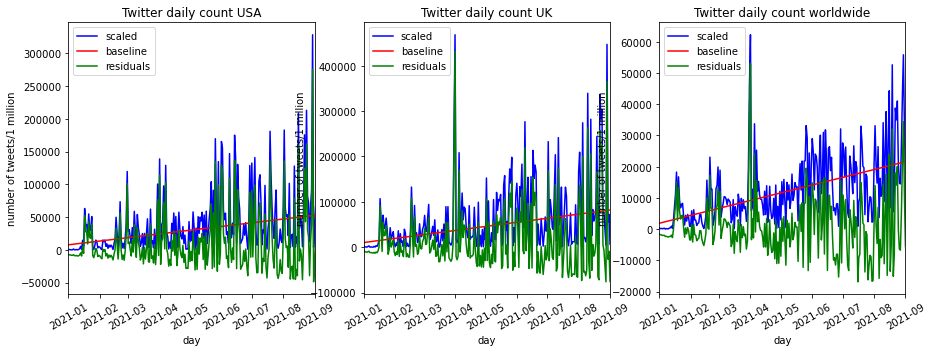

In [300]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(twitter_counts['day'],twitter_counts['USA_scaled'],color='blue', label='scaled')
ax[0].plot(twitter_counts['day'],twitter_counts['USA_baseline'],color='red',label='baseline')
ax[0].plot(twitter_counts['day'],twitter_counts['USA_residuals'],color='green',label='residuals')
ax[0].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count USA',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[0].tick_params(axis='x', rotation=30)
ax[0].legend(loc="upper left")

ax[1].plot(twitter_counts['day'],twitter_counts['UK_scaled'],color='blue', label='scaled')
ax[1].plot(twitter_counts['day'],twitter_counts['UK_baseline'],color='red',label='baseline')
ax[1].plot(twitter_counts['day'],twitter_counts['UK_residuals'],color='green',label='residuals')
ax[1].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count UK',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[1].tick_params(axis='x', rotation=30) 
ax[1].legend(loc="upper left")

ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_scaled'],color='blue', label='scaled')
ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_baseline'],color='red',label='baseline')
ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_residuals'],color='green',label='residuals')
ax[2].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count worldwide',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[2].tick_params(axis='x', rotation=30) 
ax[2].legend(loc="upper left")

plt.show()

### Extracting peak event dates

We have the following pre-calculated numbers for average daily activity variation: 

| curve    | daily variation | 
|:--------------|:----------|
| worldwide    | 5403  | 
| USA    | 19130 | 
| UK     | 41292  |

To extract peak activity counts, we will assume that any residual daily activity *3* times higher than the daily variation is significant.

In the visuals below you can see where this cut-off sits compared to the data.
Any peaks above the red dashed lines will be considered as significant activity dates. 

In [302]:
rms_worldwide=np.sqrt(np.mean(twitter_counts[(twitter_counts['day'] > dt.datetime(2021, 4,9 )) &\
                     (twitter_counts['day'] <= dt.datetime(2021, 5, 15))]['worldwide_residuals']**2))

rms_USA=np.sqrt(np.mean(twitter_counts[(twitter_counts['day'] > dt.datetime(2021, 4,9 )) &\
                     (twitter_counts['day'] <= dt.datetime(2021, 5, 15))]['USA_residuals']**2))

rms_UK=np.sqrt(np.mean(twitter_counts[(twitter_counts['day'] > dt.datetime(2021, 4,9 )) &\
                     (twitter_counts['day'] <= dt.datetime(2021, 5, 15))]['UK_residuals']**2))

print(rms_worldwide)
print(rms_USA)
print(rms_UK)

5403.635679661419
19130.538360820956
41292.47803734491


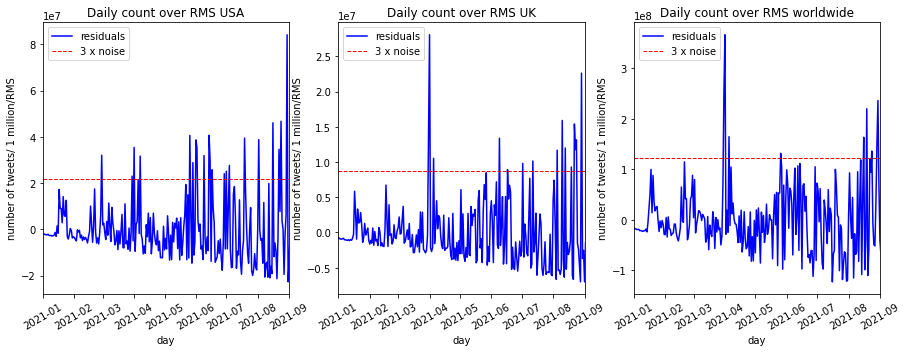

In [281]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(twitter_counts['day'],twitter_counts['USA_residuals'],color='blue', label='residuals')
ax[0].plot([dt.date(2021, 1,1 ), dt.date(2021, 9, 1)], [3*19130, 3*19130], color='red', linestyle='--', linewidth=1, label='3 x noise')
ax[0].set(xlabel='day', ylabel='number of tweets/ 1 million/RMS',
       title='Daily count over RMS USA',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[0].tick_params(axis='x', rotation=30)
ax[0].legend(loc="upper left")

ax[1].plot(twitter_counts['day'],twitter_counts['UK_residuals'],color='blue', label='residuals')
ax[1].plot([dt.date(2021, 1,1 ), dt.date(2021, 9, 1)], [3*41292, 3*41292], color='red', linestyle='--', linewidth=1, label='3 x noise')
ax[1].set(xlabel='day', ylabel='number of tweets/ 1 million/RMS',
       title='Daily count over RMS UK',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[1].tick_params(axis='x', rotation=30) 
ax[1].legend(loc="upper left")

ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_residuals'],color='blue', label='residuals')
ax[2].plot([dt.date(2021, 1,1 ), dt.date(2021, 9, 1)], [3*5403, 3*5403], color='red', linestyle='--', linewidth=1, label='3 x noise')
ax[2].set(xlabel='day', ylabel='number of tweets/ 1 million/RMS',
       title='Daily count over RMS worldwide',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[2].tick_params(axis='x', rotation=30) 
ax[2].legend(loc="upper left")

plt.show()

We will make a copy of the columns with the residuals which we would call events and then we will keep only daily counts abouve 3 RMS level. Any counts below 3 RMS we will be replaced with 0.

In [282]:
twitter_counts['USA_events']=twitter_counts['USA_residuals'].copy()
twitter_counts['UK_events']=twitter_counts['worldwide_residuals'].copy()
twitter_counts['worldwide_events']=twitter_counts['worldwide_residuals'].copy()

twitter_counts.loc[twitter_counts['USA_residuals']/rms_USA < 3.,'USA_events']=0.
twitter_counts.loc[twitter_counts['UK_residuals']/rms_UK < 3.,'UK_events']=0.
twitter_counts.loc[twitter_counts['worldwide_residuals']/rms_worldwide < 3.,'worldwide_events']=0.

We now have our Twitter high activity events dates with their coresponding number of tweets worldwide, for the USA and the UK.\
Let us visualise the data.

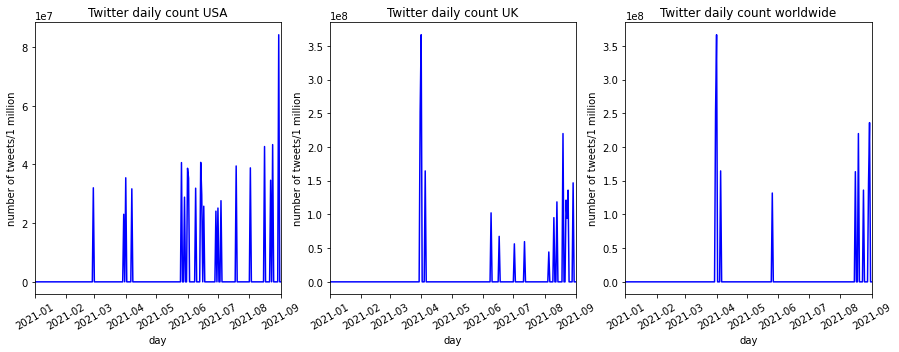

In [283]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(twitter_counts['day'],twitter_counts['USA_events'],color='blue')
ax[0].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count USA',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[0].tick_params(axis='x', rotation=30) 

ax[1].plot(twitter_counts['day'],twitter_counts['UK_events'],color='blue')
ax[1].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count UK',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[1].tick_params(axis='x', rotation=30) 

ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_events'],color='blue')
ax[2].set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter daily count worldwide',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[2].tick_params(axis='x', rotation=30) 

plt.show()

When we overplot the 3 events curves. Do all of them overlap? What about the number of tweets? Is it the same for overlaping events?

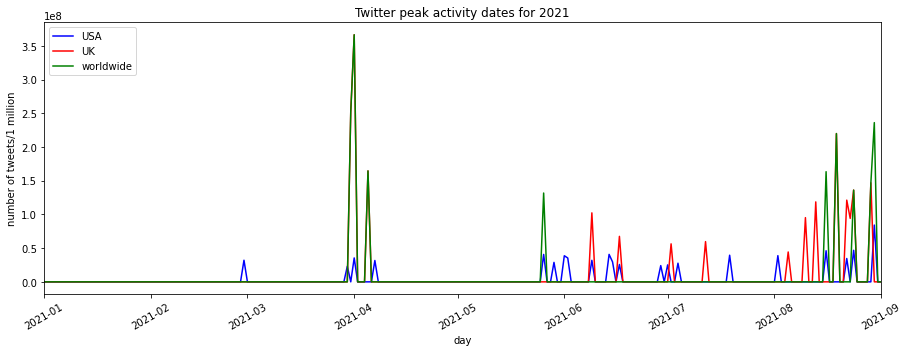

In [252]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.plot(twitter_counts['day'],twitter_counts['USA_events'],color='blue', label='USA')

ax.plot(twitter_counts['day'],twitter_counts['UK_events'],color='red', label='UK')

ax.plot(twitter_counts['day'],twitter_counts['worldwide_events'],color='green', label='worldwide')
ax.set(xlabel='day', ylabel='number of tweets/1 million',
       title='Twitter peak activity dates for 2021',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax.tick_params(axis='x', rotation=30) 

plt.legend(loc="upper left")
plt.show()

We only care about days with high twitter activity. We can extract the events columns to make a new dataframe called processed_data.
In the follow up command we will filter out rows where there are only 0.

In [253]:
processed_data=twitter_counts[['day','worldwide_events','USA_events','UK_events']]
processed_data=processed_data.loc[(processed_data[['worldwide_events','USA_events','UK_events']]!=0.).any(axis=1)].\
                                                                                            reset_index(drop=True)

We now have a clean dataset for our analysis. Below we can see the columns we kept.\
Can you also tell how many rows we are left with?

In [254]:
processed_data.columns

Index(['day', 'worldwide_events', 'USA_events', 'UK_events'], dtype='object')

We can also visualise the dataset in the form of a heat map. Pandas can print our the dataframe with colour gradient for the cells scaled the number of counts.
Light blue is for zero twitter activity and dark blue is for higher activity.

<font color='blue'>What can you say about the distribution of events between worldwide, USA and UK?</font>

________________________

<font color='blue'>Please reflect on the experience of running this task in Practera in ***Assessment ...***</font>

In [255]:
processed_data.style.background_gradient(cmap='Blues')

,day,worldwide_events,USA_events,UK_events
0,2021-02-28 00:00:00,0.000000,32053044.102348,0.000000
1,2021-03-30 00:00:00,0.000000,23022871.981842,0.000000
2,2021-03-31 00:00:00,252151801.270996,0.000000,252151801.270996
3,2021-04-01 00:00:00,366368457.534363,35463004.507141,366368457.534363
4,2021-04-05 00:00:00,164506079.587891,0.000000,164506079.587891
5,2021-04-07 00:00:00,0.000000,31698204.083038,0.000000
6,2021-05-26 00:00:00,131700785.020264,40644519.452873,0.000000
7,2021-05-29 00:00:00,0.000000,28859453.740822,0.000000
8,2021-06-01 00:00:00,0.000000,38709288.028770,0.000000
9,2021-06-02 00:00:00,0.000000,35360730.791420,0.000000


# Some final remarks

It is important to keep in mind that there are different ways to clean or pre-process data.  What is important is the end result which needs to be good enough for the type of analysis you are performing. For example, as explained before, we simplified the baseline by approximating it to a line. We could have used a more complex model for a better fit but that probably wouldn't have changed much the end results which is the list of peak event dates. Another approximation we used is for scaling the data to the population size.
- First of all, twitter data include re-tweets, so it is not a 1-to-1 relationship between tweet and user. We could use a correction factor for this. 
- Secondly, the population size for a given country is usually done through a census which is conducted every 4 to 5 years. This means that the total population numbers you used for worldwide, USA and UK might not be the right number for 2021. 
- Thirdly, we used total population numbers for scaling but it is known that Twitter has an age skew. Most Twitter users are aged between 18 and 49 years old. A better scaling would have been to use the numbers for the population aged within that age bracket. 
- Lastly, the worldwide count is not truely worldwide as some countries do not have access to Twiter. Also the scaled worldwide count to be comparable to the other 2 countries should be calculated by using a formula:

\begin{align}
worldwide\ scaled = \frac{twitter\ count\ country1}{population1} + \frac{twitter\ count\ country2}{population2} + ....
\end{align}

This is not equal to 

\begin{align}
\frac{twitter\ count\ country1 + twitter\ count\ country2 + ....}{worldwide\ population}
\end{align}

which is what we have done here.

That said, some of these corrections might not have much of an impact on the final results. All this to say that we sometimes make approximations and we are always working under some assumptions. We will not be going into such level of detail in this exercise, but for a more rigurous analysis, it is important to understand how much of an impact these approximations can have on your results. Also, it is always good to state your work assumptions so that your analysis can always be verified and replicated if need be. 